!pip install -U ultralytics

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, Image
from os import getcwd
from PIL import Image as PILImage
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import xml.etree.ElementTree as ET
import shutil
import random
import glob


import warnings
import time
import copy
import random

import numpy as np
import pandas as pd

import torch
import torch.utils.data as Data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
warnings.filterwarnings("ignore")

In [3]:
for dirname, _, filenames in os.walk('C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset'):
    count = 0
    print('\n', dirname, len(filenames), 'files')
    for filename in filenames:
        count += 1
        if count < 10:
            print(os.path.join(dirname, filename))
    print('...')


 C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset 1 files
C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset\data.yaml
...

 C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset\train 0 files
...

 C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset\train\images 1012 files
C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset\train\images\pic_031.jpg
C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset\train\images\pic_032.jpg
C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset\train\images\pic_035.jpg
C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset\train\images\pic_036.jpg
C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset\train\images\pic_037.jpg
C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset

In [4]:
with open('C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/valid/labels/foto00378.txt') as f:
    print(f.read())

0 0.541 0.507 0.125 0.147



In [5]:
def visualize_image(image_folder, annotation_folder, image_id):
    image_file = os.path.join(image_folder, image_id + '.jpg')
    
    boxes_file_addr = os.path.join(annotation_folder, image_id + '.txt')
    with open(boxes_file_addr, 'r') as f:
        boxes = [row.split() for row in f.read().split('\n') if row]
        
    print(boxes)
    
    img = cv2.imread(image_file)
    h, w = img.shape[:2]
    
    for box in boxes:
        # Convert string to float, then multiply by image dimensions to get actual pixel values
        x_center = float(box[1]) * w
        y_center = float(box[2]) * h
        width = float(box[3]) * w
        height = float(box[4]) * h

        # Convert from center coordinates to top left and bottom right corners
        x1 = int(x_center - (width / 2))
        y1 = int(y_center - (height / 2))
        x2 = int(x_center + (width / 2))
        y2 = int(y_center + (height / 2))

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

[['0', '0.508929', '0.378571', '0.975000', '0.542857']]


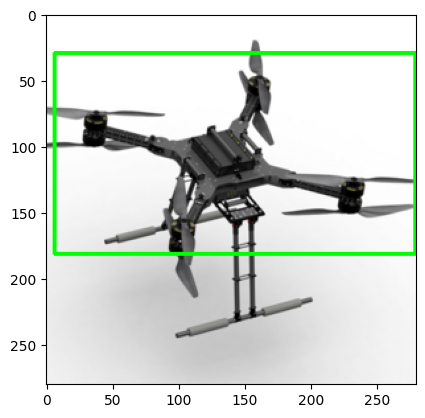

In [7]:
visualize_image(
    image_folder = 'C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/train/images/', 
    annotation_folder = 'C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/train/labels/', 
    image_id = 'pic_698'
)

[['0', '0.475148', '0.436015', '0.831953', '0.564899']]


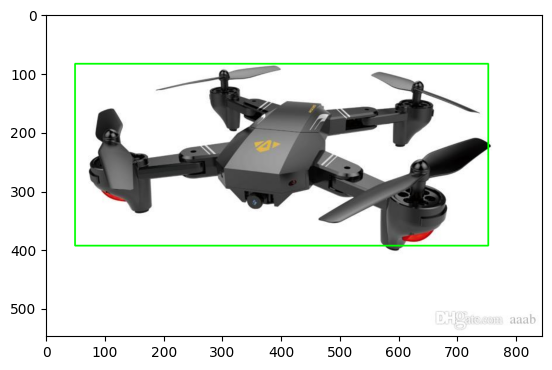

In [10]:
visualize_image(
    image_folder = 'C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/train/images/', 
    annotation_folder = 'C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/train/labels/', 
    image_id = 'pic_162'
)

[['0', '0.518000', '0.478000', '0.788000', '0.742667']]


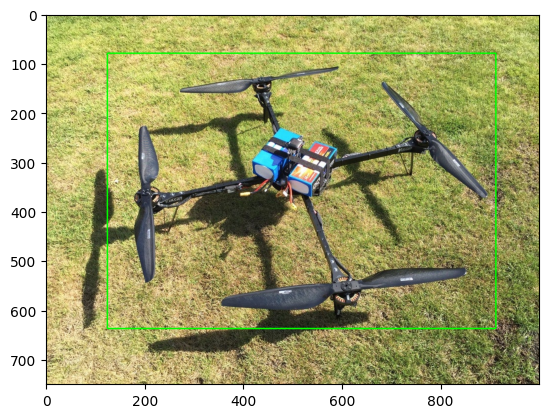

In [9]:
visualize_image(
    image_folder = 'C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/train/images/', 
    annotation_folder = 'C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/train/labels/', 
    image_id = 'pic_762'
)

[['0', '0.507', '0.42', '0.962', '0.75']]


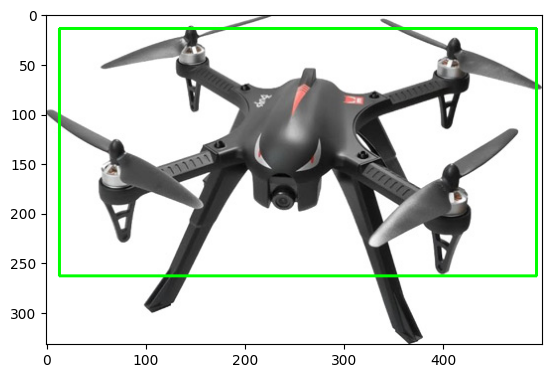

In [8]:
visualize_image(
    image_folder = 'C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/train/images/', 
    annotation_folder = 'C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/drone_dataset/train/labels/', 
    image_id = 'pic_098'
)

In [3]:
train_X = np.load("C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/train_x.npy", allow_pickle=True)
train_Y = np.load("C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/train_y.npy", allow_pickle=True)
valid_X = np.load("C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/valid_x.npy", allow_pickle=True)
valid_Y = np.load("C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/valid_y.npy", allow_pickle=True)
test_X = np.load("C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/test_x.npy", allow_pickle=True)
test_Y = np.load("C:/Users/goodc/OneDrive/Desktop/ComputerVision_DeepLearning/dataset/test_y.npy", allow_pickle=True)

print(train_X.shape, type(train_X))
print(train_Y.shape, type(train_X))
print(valid_X.shape, type(valid_X))
print(valid_Y.shape, type(valid_X))
print(test_X.shape, type(test_X))
print(test_Y.shape, type(test_X))

(45000, 3, 64, 64) <class 'numpy.ndarray'>
(45000,) <class 'numpy.ndarray'>
(15000, 3, 64, 64) <class 'numpy.ndarray'>
(15000,) <class 'numpy.ndarray'>
(10000, 3, 64, 64) <class 'numpy.ndarray'>
(10000,) <class 'numpy.ndarray'>


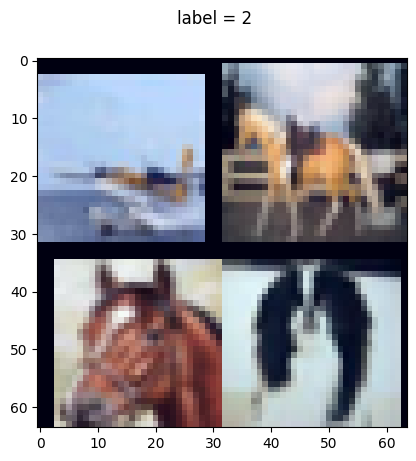

In [6]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_yticks([], minor=True)

def show_example(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)
    plt.show()

count = train_X.shape[0]
number = random.randrange(count)
show_example(train_X[number], train_Y[number])

In [7]:
train_on_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if not train_on_gpu:
    print("Using GPU is not available.", "Device:", device)
else:
    print("Using GPU is available.", "Device:", device)

Using GPU is available. Device: cuda:0


In [12]:
def Model_Densenet201():
    # ========================================================================================================================

    num_classes = 4
    batch_size = 128
    num_epochs = 60

    # ========================================================================================================================

    # for i in range(len(train_X)):
    #     for j in range(len(train_X[i])):
    #         min = train_X[i][j].min()
    #         max = train_X[i][j].max()
    #         train_X[i][j] = abs((train_X[i][j] - min) / (max - min))
    #
    # for i in range(len(valid_X)):
    #     for j in range(len(valid_X[i])):
    #         min = valid_X[i][j].min()
    #         max = valid_X[i][j].max()
    #         valid_X[i][j] = abs((valid_X[i][j] - min) / (max - min))
    #
    # for i in range(len(test_X)):
    #     for j in range(len(test_X[i])):
    #         min = test_X[i][j].min()
    #         max = test_X[i][j].max()
    #         test_X[i][j] = abs((test_X[i][j] - min) / (max - min))

    # ========================================================================================================================

    train_X_toTensor = torch.Tensor(train_X)
    train_Y_toTensor = torch.Tensor(train_Y)
    train_Y_toLongTensor = train_Y_toTensor.type(torch.LongTensor)
    train_dataset = Data.TensorDataset(train_X_toTensor, train_Y_toLongTensor)

    valid_X_toTensor = torch.Tensor(valid_X)
    valid_Y_toTensor = torch.Tensor(valid_Y)
    valid_Y_toLongTensor = valid_Y_toTensor.type(torch.LongTensor)
    valid_dataset = Data.TensorDataset(valid_X_toTensor, valid_Y_toLongTensor)

    test_X_toTensor = torch.Tensor(test_X)
    test_Y_toTensor = torch.Tensor(test_Y)
    test_Y_toLongTensor = test_Y_toTensor.type(torch.LongTensor)
    test_dataset = Data.TensorDataset(test_X_toTensor, test_Y_toLongTensor)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    dataloaders = {'train_dataset': train_loader, 'valid_dataset': valid_loader, 'test_dataset': test_loader}

    # ========================================================================================================================

    def initialize_densenet201(num_classes, feature_extract, pretrained=True):
        cnn_model = models.densenet201(pretrained=pretrained)
        if feature_extract:
            for parameter in cnn_model.parameters():
                parameter.set_parameter_requires_grad = False
        num_features = cnn_model.classifier.in_features
        cnn_model.classifier = nn.Linear(num_features, num_classes)
        return cnn_model

    feature_extract = True
    cnn_model = initialize_densenet201(num_classes, feature_extract, pretrained=True)

    # ========================================================================================================================

    model_parameter = cnn_model.parameters()
    if feature_extract:
        model_parameter = []
        for name, parameter in cnn_model.named_parameters():
            if parameter.requires_grad == True:
                model_parameter.append(parameter)

    optimizer = optim.Adam(model_parameter, lr=1e-2)
    criterion = nn.CrossEntropyLoss()

    # ========================================================================================================================

    def train_model(model, criterion, optimizer, num_epochs=25):
        model.to(device)
        train_accuracy_history = []
        valid_accuracy_history = []
        train_losses = []
        valid_losses = []
        LRs = [optimizer.param_groups[0]['lr']]
        best_accuracy = 0
        best_model = copy.deepcopy(model.state_dict())
        since = time.time()

        for epoch in range(num_epochs):
            for phase in ['train_dataset', 'valid_dataset']:
                if phase == 'train_dataset':
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_corrects = 0

                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train_dataset'):
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                        _, predictions = torch.max(outputs, 1)

                        if phase == 'train_dataset':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item()
                    running_corrects += torch.sum(predictions == labels.data)

                epoch_loss = running_loss / len(dataloaders[phase].dataset)
                epoch_accuracy = running_corrects.double() / len(dataloaders[phase].dataset)

                time_elapsed = time.time() - since
                print('Time elapsed in epoch {}: {:.0f}m {:.0f}s'.format(epoch + 1, time_elapsed // 60, time_elapsed % 60))
                print('{} Loss: {:.4f} Accuracy:{:.4f}'.format(phase, epoch_loss, epoch_accuracy))

                if phase == 'valid_dataset' and epoch_accuracy > best_accuracy:
                    best_accuracy = epoch_accuracy
                    best_model = copy.deepcopy(model.state_dict())

                if phase == 'valid_dataset':
                    valid_accuracy_history.append(epoch_accuracy)
                    valid_losses.append(epoch_loss)

                if phase == 'train_dataset':
                    train_accuracy_history.append(epoch_accuracy)
                    train_losses.append(epoch_loss)

            print('Optimizer learning rate: {:.7f}\n'.format(optimizer.param_groups[0]['lr']))
            LRs.append(optimizer.param_groups[0]['lr'])

        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print('Best valid accuracy: {:4f}\n'.format(best_accuracy))

        model.load_state_dict(best_model)
        return model, valid_accuracy_history, train_accuracy_history, valid_losses, train_losses, LRs

    cnn_model, valid_accuracy_history, train_accuracy_history, valid_losses, train_losses, LRs = train_model(cnn_model, criterion, optimizer, num_epochs=num_epochs)

    # ========================================================================================================================

    # x1_axix = []
    # y1_axix = []
    # y2_axix = []

    # for i in range(num_epochs):
    #     x1_axix.append(i)
    #     y1_axix.append(int(train_accuracy_history[i].item() * 100))
    #     y2_axix.append(int(valid_accuracy_history[i].item() * 100))

    # fig, ax = plt.subplots()
    # plt.title("The accuracy in every epoch")
    # plt.xlabel("Epoch")
    # plt.ylabel("Accuracy (%)")
    # plt.plot(x1_axix, y1_axix, color="#00008B", marker='.', linestyle="-")
    # plt.plot(x1_axix, y2_axix, color="#006400", marker='.', linestyle="-")
    # for a, b in zip(x1_axix, y1_axix):
    #     plt.text(a, b, b, ha='center', va='bottom', fontsize=6)
    # for a, b in zip(x1_axix, y2_axix):
    #     plt.text(a, b, b, ha='center', va='bottom', fontsize=6)
    # plt.legend(['train acc', 'valid acc'])
    # plt.savefig("The accuracy of densenet201 model.png")

    x1_axix = []
    y1_axix = []
    y2_axix = []

    for i in range(num_epochs):
        x1_axix.append(i)
        y1_axix.append(int(train_accuracy_history[i].item() * 100))
        y2_axix.append(int(valid_accuracy_history[i].item() * 100))

    fig, ax = plt.subplots()
    plt.title("The accuracy in every epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.plot(x1_axix, y1_axix, color="#00008B", marker='.', linestyle="-")
    plt.plot(x1_axix, y2_axix, color="#006400", marker='.', linestyle="-")
    for a, b in zip(x1_axix, y1_axix):
        if a % 2 == 0:
            plt.text(a, b, b, ha='center', va='bottom', fontsize=6)
    for a, b in zip(x1_axix, y2_axix):
        if a % 2 == 0:
            plt.text(a, b, b, ha='center', va='bottom', fontsize=6)
    plt.legend(['train acc', 'valid acc'])
    plt.savefig("The accuracy of densenet201 model.png")

    # ========================================================================================================================

    def test_model(model):
        model.eval()
        running_corrects = 0
        for inputs, labels in dataloaders["test_dataset"]:
            inputs = inputs.to(device)
            labels = labels.to(device)
            output = model(inputs)
            _, predictions = torch.max(output, 1)
            running_corrects += torch.sum(predictions == labels.data)
        prediction_accuracy = running_corrects.double() / len(dataloaders["test_dataset"].dataset)
        return prediction_accuracy.item() * 100

    print("The accuracy of the test dataset: ", test_model(cnn_model), "%")

    # ========================================================================================================================

Time elapsed in epoch 1: 0m 47s
train_dataset Loss: 0.0115 Accuracy:0.2676
Time elapsed in epoch 1: 0m 53s
valid_dataset Loss: 0.0107 Accuracy:0.3106
Optimizer learning rate: 0.0100000

Time elapsed in epoch 2: 1m 54s
train_dataset Loss: 0.0105 Accuracy:0.3319
Time elapsed in epoch 2: 2m 2s
valid_dataset Loss: 0.0103 Accuracy:0.3709
Optimizer learning rate: 0.0100000

Time elapsed in epoch 3: 3m 7s
train_dataset Loss: 0.0101 Accuracy:0.3670
Time elapsed in epoch 3: 3m 14s
valid_dataset Loss: 0.0141 Accuracy:0.3772
Optimizer learning rate: 0.0100000

Time elapsed in epoch 4: 4m 17s
train_dataset Loss: 0.0098 Accuracy:0.3933
Time elapsed in epoch 4: 4m 25s
valid_dataset Loss: 0.0100 Accuracy:0.3772
Optimizer learning rate: 0.0100000

Time elapsed in epoch 5: 6m 8s
train_dataset Loss: 0.0095 Accuracy:0.4184
Time elapsed in epoch 5: 6m 18s
valid_dataset Loss: 0.0095 Accuracy:0.4301
Optimizer learning rate: 0.0100000

Time elapsed in epoch 6: 7m 33s
train_dataset Loss: 0.0094 Accuracy:0.422

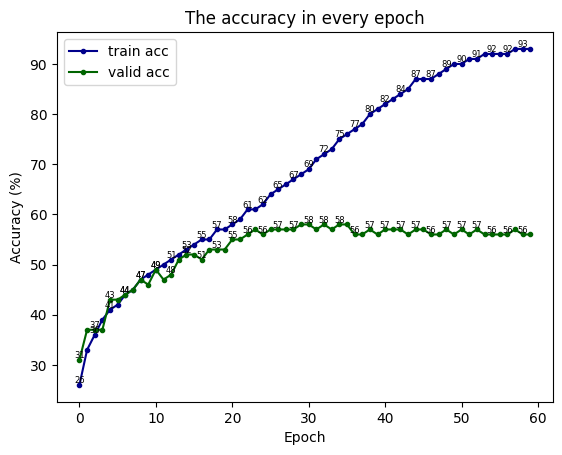

In [13]:
if __name__ == '__main__':
    Model_Densenet201()